# Bulldozer Price Regression Project

## Overview
This project focuses on developing and evaluating a machine learning model to predict bulldozer sale prices. The dataset consists of historical sales data, which includes features such as equipment type, sale dates, and geographic information. The goal is to create a model that provides reliable price predictions to assist buyers and sellers in making informed decisions.

### Source
The project is based on a hands-on learning experience from the **Complete A.I. & Machine Learning, Data Science Bootcamp** by **Zero To Mastery Academy**. This structured course provided a comprehensive approach to mastering data science and machine learning techniques, and I applied these techniques to complete the project.

## Key Steps

### 1. Problem definition

The main challenge is predicting bulldozer sale prices based on its characteristics and historical data on similar bulldozers' prices.

### 2. Data

The dataset was sourced from the Kaggle Bluebook for Bulldozers competition: https://www.kaggle.com/c/bluebook-for-bulldozers/data

The dataset consists of three main files::

* **Train.csv:** Contains data until the end of 2011, used for training the model.
* **Valid.csv:** Covers data from January 1, 2012, to April 30, 2012. It is used for validation during the competition and forms the public leaderboard.
*  **Test.csv:** Contains data from May 1, 2012, to November 2012. This dataset is used for the final evaluation and ranks participants.

### 3. Evaluation

The model is evaluated based on RMSLE (Root Mean Squared Logarithmic Error), which measures the difference between the actual and predicted auction prices. The goal is to minimize the RMSLE score for the best model.

For more on the evaluation of this project, check: www.kaggle.com/competitions/bluebook-for-bulldozers/overview/evaluation

**Note:** The goal for most regression evaluation metrics is to minimize the error. For example, our goal for this project will be to build a machine learning model which minimizes RMSLE

### 4. Features

Kaggle provides a data dictionary detailing all of the features of the dataset. You can view this data dictionary here: machine_learning/Bulldozer-price-prediction-project/data/bluebook-for-bulldozers/Data Dictionary.xlsx

In [1]:
# Import necessary libraries

# Data Analysis libraries
import numpy as np
import pandas as pd

# Visualization library
%matplotlib inline
import matplotlib.pyplot as plt

# Machine Learning model
from sklearn.ensemble import RandomForestRegressor

# Evaluation metrics
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# Import training and validation datasets fron the specified CVS file
# 'low_memroy=False' ensure the data types are inferred more accurately for large dataset
# Let enrich the time and date components, so as to specify which column contains dates
# Since it is a time series data
df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv", low_memory=False)

# Display a summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [3]:
# Total number of missing values in each column of the datasets
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

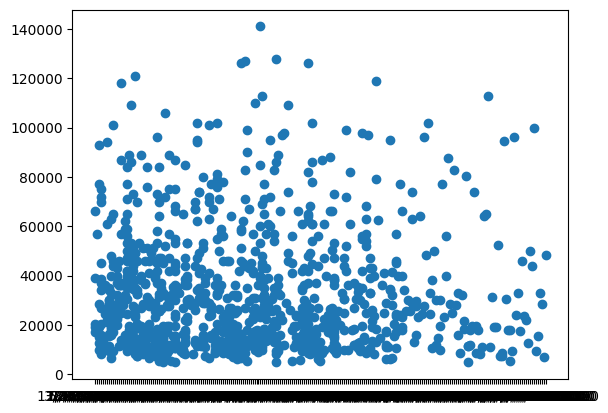

In [4]:
# Create a new figure and axis for the plot
fig, ax = plt.subplots()

# Plot a scatter plot of the first 1000 rows of 'saledate' vs 'SalePrice'
# 'saledate' is plotted on the x-axis, and 'SalePrice' is plotted on the y-axis
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

# Display the scatter plot
plt.show();

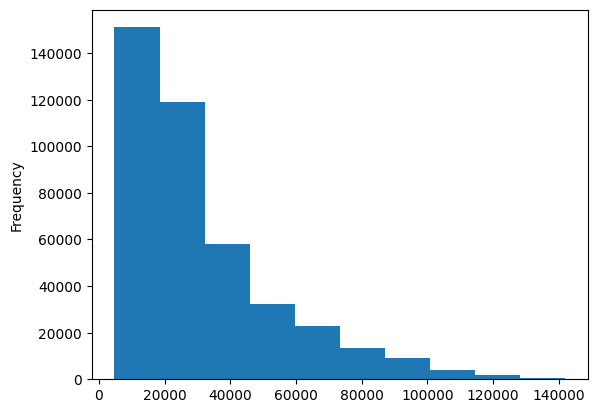

In [5]:
# Plot a histogram of 'SalePrice'
df.SalePrice.plot.hist()
plt.show()

#### Parsing Dates
For time series data, enriching the time and date components is crucial.This can be done by using pandas' `parse_dates` parameter to specify which column contains dates.

In [6]:
# Import the dataset again, this time parsing the 'saledate' column as datetime
df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv",
                 low_memory=False, parse_dates=["saledate"])

# Display the first 1000 rows of the 'saledate' column
df.saledate[:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

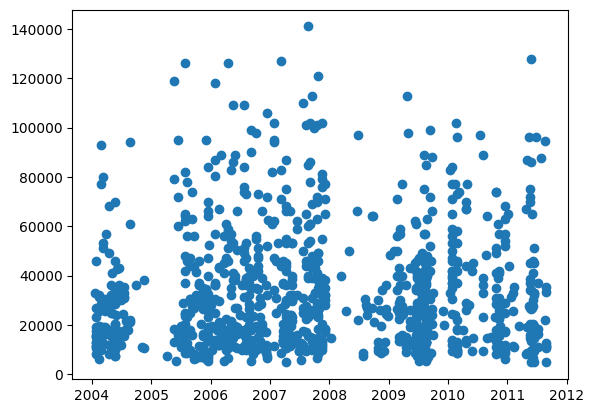

In [7]:
# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Plot a scatter plot of the first 1000 rows of 'saledate' vs. 'SalePrice'
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

# Display the plot
plt.show()


In [8]:
# Display the first few rows of the dataset, transposed for easier column comparison
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


### Sort DataFrame by `saledate`

When working with time series data, it's a good idea to sort it by date

In [9]:
# Sort the DataFrame by 'saledate' in ascending order
df = df.sort_values(by=["saledate"], ascending=True)

# Display the first 20 rows of the 'saledate' column
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Make a copy of the original DataFrame

We make a copy of the original dataframe so when we manipulate the copy, we've still got our original data

In [10]:
# Make a copy of the original dataframe
df_tmp = df.copy()

In [11]:
# Extract date-related features from the 'saledate' column
df_tmp["saleYear"] = df_tmp.saledate.dt.year          # Extract the year
df_tmp["saleMonth"] = df_tmp.saledate.dt.month        # Extract the month
df_tmp["saleDay"] = df_tmp.saledate.dt.day            # Extract the day
df_tmp["saleDayOfWeek"] = df_tmp.saledate.dt.dayofweek  # Extract the day of the week
df_tmp["saleDayOfYear"] = df_tmp.saledate.dt.dayofyear  # Extract the day of the year


In [12]:
df_tmp.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls', 'saleYear',
       'saleMonth', 'saleDay', 'saleDayOfWeek', 'saleDayOfYear'],

In [13]:
# Now that we've enriched our DataFrame with date time features, we can remove saledate
df_tmp = df_tmp.drop("saledate", axis=1)

### Convert string to categories

Let's turn all the data into numbers by converting them into pandas categories.

In [14]:
# Loop through each column to identify and print columns containing string data type
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label, end=" ")

fiModelDesc fiBaseModel fiProductClassDesc state ProductGroup ProductGroupDesc 

In [15]:
# Convert all string columns to categorical values with ordered categories
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [16]:
# Display a summary of the DataFrame to see the changes
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   object  
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  object  
 12  fiModelSeries             58667 non-null   object  
 13  fiModelDescriptor         748

### Missing Data

Let's now focus on working on missing data. Since we have check for the missing data before, we don't need to check them again

In [17]:
# First, let's loop through each column to identify and print columns containing numeric data types
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [18]:
# Check for which numeric columns have null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [19]:
# Fill numeric values with the median
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells if the data was missing
            df_tmp[label + "_is_missing"] = pd.isnull(content)
            # Fill the missing numeric values with median
            df_tmp[label] = content.fillna(content.median())

In [20]:
# Check if there's any null numeric values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [21]:
# Let's check for any remaining null values
df_tmp.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

#### Fill and turn categorical variable into numbers

In [22]:
# Turn each non-numeric values to numeric and fill missing data
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing values
        df_tmp[label + "_is_missing"] = pd.isnull(content)
        # Turn categories into numbers and add +1
        df_tmp[label] = pd.Categorical(content).codes + 1

In [23]:
# Recheck for null values
df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

### Modeling

In [24]:
# Instantiate model
model = RandomForestRegressor(n_jobs=-1, random_state=42)

# Seperate the data to X and y
X = df_tmp.drop("SalePrice", axis=1)
y = df_tmp["SalePrice"]

# Fit the model
model.fit(X, y)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [25]:
# Score the model
model.score(X, y)

0.9875468079970562

#### Splitting data into train/validation sets

In [26]:
# Split the data into training and validation sets based on the 'saleYear' column
# Validation data contains rows where the 'saleYear' is 2012
df_val = df_tmp[df_tmp.saleYear == 2012]

# Training data contains rows where the 'saleYear' is not 2012
df_train = df_tmp[df_tmp.saleYear != 2012]

In [27]:
# Split training data
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train["SalePrice"]

# Split validation data
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val["SalePrice"]

#### Building an evaluation function

In [28]:
def rmsle(y_test, y_preds):
    """
    Calculate the Root Mean Squared Logarithmic Error (RMSLE) 
    between predictions and true labels.
    RMSLE is useful for regression problems where the target 
    variable has exponential growth.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Function to evaluate the model's performance on training and validation data
def show_scores(model):
    # Predict on both training and validation sets
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    
    # Calculate various evaluation metrics (MAE, RMSLE, R^2) for both training and validation sets
    scores = {
        "Training MAE": mean_absolute_error(y_train, train_preds),  
        "Valid MAE": mean_absolute_error(y_valid, val_preds),       
        "Training RMSLE": rmsle(y_train, train_preds),               
        "Valid RMSLE": rmsle(y_valid, val_preds),                     
        "Training R^2": r2_score(y_train, train_preds),               
        "Valid R^2": r2_score(y_valid, val_preds)                     
    }
    
    return scores


#### Testing our model on a subset (to tune the hyperparameters)

In [29]:
# Create a RandomForestRegressor model with updated 'max_samples' value to limit the number of samples used for fitting
model = RandomForestRegressor(n_jobs=-1, random_state=42,
                              max_samples=10000)

# Fit the training set
model.fit(X_train, y_train)

RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [30]:
# Evaluate the model's performance using the show_scores function
show_scores(model)

{'Training MAE': np.float64(5561.2988092240585),
 'Valid MAE': np.float64(7177.26365505919),
 'Training RMSLE': np.float64(0.257745378256977),
 'Valid RMSLE': np.float64(0.29362638671089003),
 'Training R^2': 0.8606658995199189,
 'Valid R^2': 0.8320374995090507}

### Hyperparameter tuning with RandomizedSearchCV

In [31]:
# Define the hyperparameter grid for RandomForestRegressor
rf_grid = {
    "n_estimators": np.arange(10, 100, 10),            
    "max_depth": [None, 3, 5, 10],                     
    "min_samples_split": np.arange(2, 20, 2),            
    "min_samples_leaf": np.arange(1, 20, 2),             
    "max_features": [0.5, 1, "sqrt", "log2"],           
    "max_samples": [10000]     
}

# Instantiate RandomizedSearchCV for hyperparameter tuning
rs_model = RandomizedSearchCV(
    estimator=RandomForestRegressor(n_jobs=-1, random_state=42),  
    param_distributions=rf_grid,  
    n_iter=100,                   
    cv=5,                        
    verbose=True                 
)

# Fit the RandomizedSearchCV model on the training data
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'log2'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [32]:
# Retrieve the best hyperparameters found by the RandomizedSearchCV model
rs_model.best_params_

{'n_estimators': np.int64(80),
 'min_samples_split': np.int64(6),
 'min_samples_leaf': np.int64(1),
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

In [33]:
# Evaluate the RandomizedSearch model
show_scores(rs_model)

{'Training MAE': np.float64(5794.91414091328),
 'Valid MAE': np.float64(7265.313535538384),
 'Training RMSLE': np.float64(0.26610366963152154),
 'Valid RMSLE': np.float64(0.2980858837187065),
 'Training R^2': 0.850905168349276,
 'Valid R^2': 0.832224638653678}

### Train a model wwith the best hyperparameters

In [35]:
# Most ideal hyperparameter
ideal_model = RandomForestRegressor(n_estimators=80,
                                    min_samples_leaf=1,
                                    min_samples_split=6,
                                    max_samples=10000,
                                    max_features=0.5,
                                    max_depth=None,
                                    random_state=42)

# Fit the ideal model
ideal_model.fit(X_train, y_train)

RandomForestRegressor(max_features=0.5, max_samples=10000, min_samples_split=6,
                      n_estimators=80, random_state=42)

### Make predictions on test data

In [37]:
# Import the test data
df_test = pd.read_csv("data/bluebook-for-bulldozers/Test.csv",
                      low_memory=False, parse_dates=["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


### Preprocessing the data

After working on the data, we realize the test dataset was not in the same format as our training dataset, and as such, we have to preprocess the test data

In [38]:
def preprocess_data(df):
    """
    Transforms datetime columns, handles missing values, and encodes categorical features.
    """
    # Extract date components from 'saledate'
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear
    
    # Drop the original 'saledate' column
    df.drop("saledate", axis=1, inplace=True)
    
    # Handle missing numeric data: create indicator and fill with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content) and pd.isnull(content).sum():
            df[label + "_is_missing"] = pd.isnull(content)
            df[label] = content.fillna(content.median())
        
        # Handle missing categorical data: create indicator and encode categories
        if not pd.api.types.is_numeric_dtype(content):
            df[label + "_is_missing"] = pd.isnull(content)
            df[label] = pd.Categorical(content).codes + 1
    
    return df


In [39]:
# Preprocess the test data
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [40]:
# How many columns differ
missing_cols = set(X_train.columns) - set(df_test.columns)
missing_cols

{'auctioneerID_is_missing'}

In [41]:
# Add missing columns to df_test with default value of 0
for col in missing_cols:
    df_test[col] = 0

In [43]:
# Reorder df_test columns to match X_train
df_test = df_test[X_train.columns]
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [44]:
# Make predictions on the test data
test_preds = ideal_model.predict(df_test)

In [45]:
# Format predictions into the same format Kaggle is after
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds.head()

,SalesID,SalesPrice
0,1227829,19211.000000
1,1227844,21147.723214
2,1227847,53416.376488
3,1227848,66023.407738
4,1227863,43498.020833


In [46]:
# Export prediction data
df_preds.to_csv("data/bluebook-for-bulldozers/test_predictions.csv", index=False)

#### Feature Importance

Feature importance helps determine which features (attributes) in the dataset had the most significant impact on predicting the target variable (e.g., SalePrice). It enables you to identify key drivers of your model’s predictions and can guide feature selection, allowing for more efficient and interpretable models.

In [48]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    """
    Plots the top 'n' most importance features based on their importance scores.
    """
    # Create a DataFrame for feature names and their importance scores, then sort by importance
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
         .sort_values("feature_importances", ascending=False)
         .reset_index(drop=True))
    
    # Plot the sorted feature importance
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:n])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")   
    ax.invert_yaxis()
    plt.show()

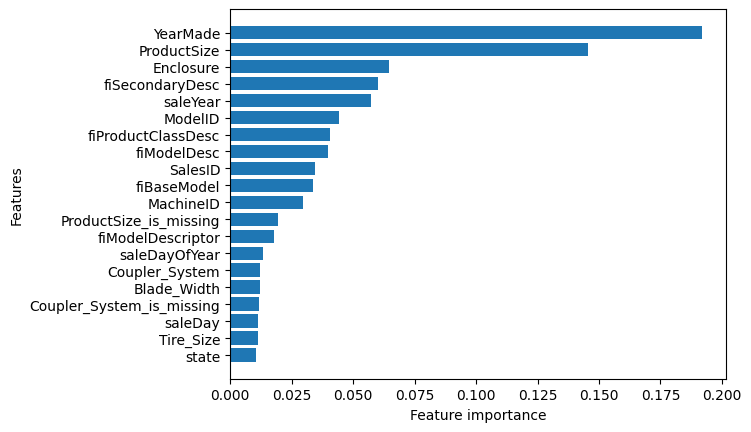

In [49]:
# Plot feature importance for the trained model
plot_features(X_train.columns, ideal_model.feature_importances_)